In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rescale_frame(frame, scale=1):
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    dimension = (width, height)
    output = cv.resize(frame, dimension, interpolation=cv.INTER_AREA)
    return output

def translate(img, x, y): # -x --> Left | -y --> Up | x --> Right | y --> Down
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)

In [18]:
img_right = cv.imread("img/tree_r.pgm", cv.IMREAD_GRAYSCALE)
img_left  = cv.imread("img/tree_l.pgm", cv.IMREAD_GRAYSCALE)

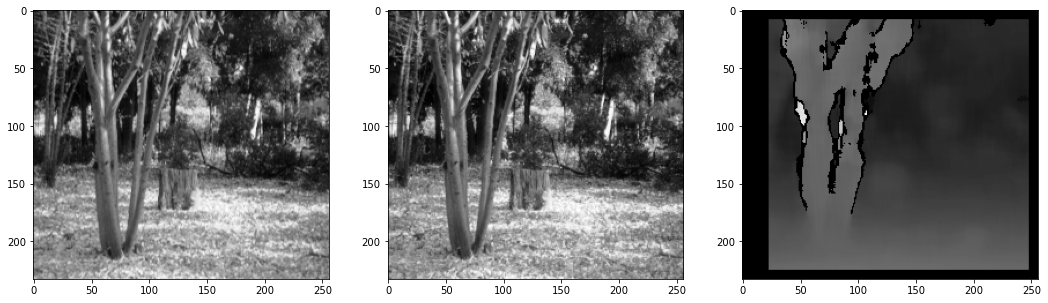

In [69]:
stereo = cv.StereoBM_create(numDisparities=16, blockSize=17)
depth = stereo.compute(img_left, img_right)
#dilate = cv.dilate(depth, (7,7), iterations=10)
#erode = cv.erode(dilate, (5,5), iterations=10)

h, w = depth.shape
argmax_depth = np.argmax(depth)
width_box = 10
height_box = 10
y = round(argmax_depth/w)
x = (argmax_depth/w - y)*w
x1, y1 = int(x-width_box/2), int(y-height_box/2)
x2, y2 = int(x+width_box/2), int(y+height_box/2)
#cv.rectangle(depth, (x1, y1), (x2,y2), (0, 255, 0), 2)

fig, axes = plt.subplots(1,3)
fig.set_size_inches(18, 12)
#fig.suptitle('Image L / Image R / Depth')
axes[0].imshow(img_left, cmap="gray")
axes[1].imshow(img_right, cmap="gray")
axes[2].imshow(depth, cmap="gray")

In [82]:
# Camera
cam = cv.VideoCapture(0)
stereo = cv.StereoBM_create(numDisparities=0, blockSize=5)
first_load = True
mean_depths = []
while True:
    # Import capture of video then flip
    isTrue, original_frame = cam.read()
    original_frame = cv.flip(original_frame, 1)
    original_frame = cv.cvtColor(original_frame, cv.COLOR_BGR2GRAY)
    if isTrue:
        if first_load:
            frame_1 = original_frame
            first_load = False
            if cv.waitKey(20) & 0xFF == ord('q'):
                break
        else:
            frame_2 = original_frame
            depth = stereo.compute(frame_1, frame_2)
            #if np.mean(depth) > mean_depths.append(np.mean(depth)):
            #    print("movement")
            # ================ Show frame
            cv.imshow("Depth", depth)
            cv.imshow("Frame 1", frame_1)
            cv.imshow("Frame 2", frame_2)
            first_load = True
            # If q pressed then quit
# Destroy all window
cam.release()
cv.destroyAllWindows()

In [81]:
cam = cv.VideoCapture(-1, cv.IMREAD_GRAYSCALE)
while True:
    isTrue, original_frame = cam.read()
    original_frame = cv.flip(original_frame, 1)
    cv.imshow("Video", original_frame)
    if cv.waitKey(20) & 0xFF == ord('q'):
        break
cam.release()
cv.destroyAllWindows()